# Happiness in the world in 2019

We all know that 2020 is being a very hard year, both in terms of health, and social and economic, but... Which of these parameters can have the greatest impact on people's happiness? Is it the same in all parts of the world or is it culturally independent?

For this, we will carry out an analysis of the happiness data in 2019 just with other important aspects to carry out the study.

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative.

In [2]:
# packages
import pandas as pd 

# Read datafile cvs with pandas
data = pd.read_csv('happy_2019.csv') 

# first 5 lines of the loaded data 
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7769,1340,1587,986,596,153,393
1,2,Denmark,7600,1383,1573,996,592,252,410
2,3,Norway,7554,1488,1582,1028,603,271,341
3,4,Iceland,7494,1380,1624,1026,591,354,118
4,5,Netherlands,7488,1396,1522,999,557,322,298


In [3]:
# we need to see the columns completely
print(data.columns, '\n') # I use \n for add space

# type of data by variable
print(data.dtypes)

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object') 

Overall rank                     int64
Country or region               object
Score                            int64
GDP per capita                   int64
Social support                   int64
Healthy life expectancy          int64
Freedom to make life choices     int64
Generosity                       int64
Perceptions of corruption        int64
dtype: object


We can see the names of the columns. The columns provide the values of the variables of 6 factors: economic production, social support, life expectancy, freedom, absence of corruption and generosity. In principle, in a utopia, we should observe maximum values in each of the variables, while in a dystrophy, we would observe minimum values in each of the columns.

To make a quick look to see which of the variables can be important, we will make a correlation matrix between numerical variables.

In [4]:
# we exclude 'Overall rank' column
df1 = data[data.columns.difference(["Overall rank"])]

# show table with correlations between variables
coor = df1.corr()
coor

,Freedom to make life choices,GDP per capita,Generosity,Healthy life expectancy,Perceptions of corruption,Score,Social support
Freedom to make life choices,1.000000,0.379079,0.269742,0.390395,0.438843,0.566742,0.447333
GDP per capita,0.379079,1.000000,-0.079662,0.835462,0.298920,0.793883,0.754906
Generosity,0.269742,-0.079662,1.000000,-0.029511,0.326538,0.075824,-0.048126
Healthy life expectancy,0.390395,0.835462,-0.029511,1.000000,0.295283,0.779883,0.719009
Perceptions of corruption,0.438843,0.298920,0.326538,0.295283,1.000000,0.385613,0.181899
Score,0.566742,0.793883,0.075824,0.779883,0.385613,1.000000,0.777058
Social support,0.447333,0.754906,-0.048126,0.719009,0.181899,0.777058,1.000000


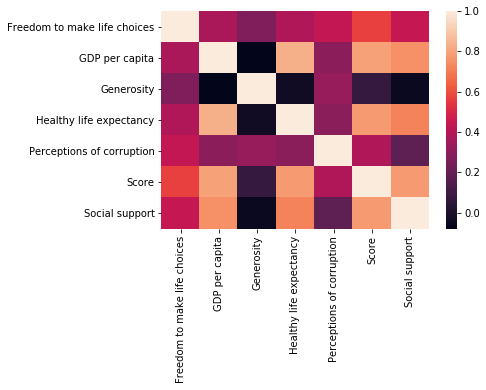

In [5]:
# package for plot
import seaborn as sns

# plot
sns.heatmap(coor, xticklabels = coor.columns.values, yticklabels = coor.columns.values)

We can observe in the color scale, the values closer to 1 (perfect correlation), acquire a softer tone. Thus, looking at the variable 'Score' on the graph and looking for the smoothest colors with the variables that are correlated, we find that 'GPD per capita', 'Heathly life expected' and 'Social support', are the variables with the highest correlation with the score in happiness.

Now that we have this information, we will try to obtain a model that explains this correlation to try to analyze this case. The study will be conducted first for each of the variables. Then we will make a correlation model for the three variables.

Before making the correlation model, we must know if our data have a normal distribution, to which we will make a Pearson's R. In case of not following a normal distribution, it is a nonparametric study, a Spearman's Rank correlation.

## Study of data distributions

Normal distribution, also known as Gaussian distribution, is a probability function that describes how the values of a variable are distributed. It is a symmetric distribution in which most observations fall around the central peak and the probabilities of values farther from the mean decrease equally in both directions, with fewer outliers at the upper and lower ends of the data range.

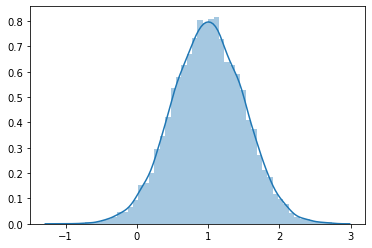

In [6]:
# example of a normal distribution
# package
import numpy as np


# data
x = np.random.normal(1, .5, 10000) # 10000 numbers normal distribution with mean 1 and standar desviation 0.5

# plot
sns.distplot(x)

### Scrore

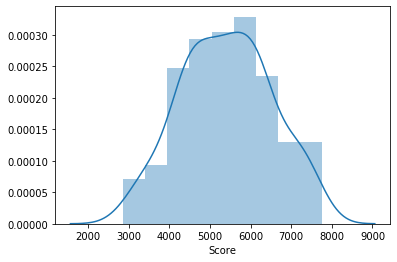

In [7]:
# data
x = df1['Score']

# plot
sns.distplot(x)

We can easily see that this is a normal distribution.

### GDP per capita

NameError: name 'plt' is not defined

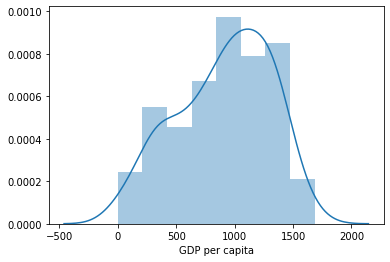

In [8]:
# data
x = df1['GDP per capita']

# plot
sns.distplot(x)

# show
plt.show()

It is not very clear if it is a normal distribution, for this reason, we are going to deepen making a q-q plot and a Shapiro-Wills test.

Stats = 0.9652916193008423   p-value = 0.000582209147978574


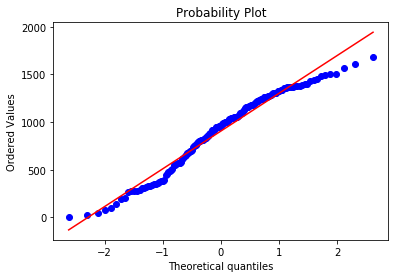

In [9]:
# package
import scipy.stats as stats # needed for normal study
import pylab as pylab # needed for the qq plot

# Shapiro Wills test
stat, pvalue = stats.shapiro(x)
print("Stats = {}   p-value = {}".format(stat, pvalue))

# quartil-quartil plot
stats.probplot(x, dist = 'norm', plot = pylab)
pylab.show()

We can now clearly see that this is a normal distribution, both in the qqplot graph and in the Shapiro Will test, since its pvalue is less than 0.05

### Healthy life expectancy

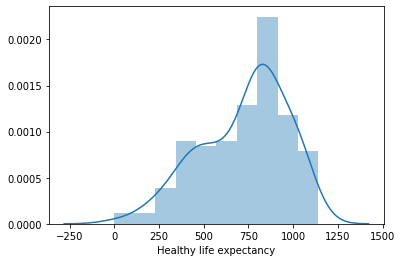

In [10]:
# data
x = df1['Healthy life expectancy']

# plot
sns.distplot(x)

Stats = 0.9534121155738831   p-value = 4.4986856664763764e-05


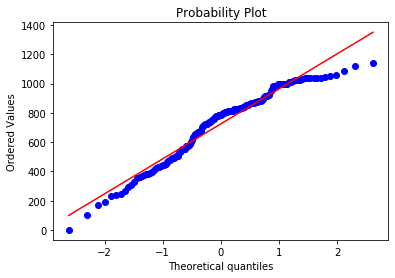

In [11]:
# package
import scipy.stats as stats # needed for normal study
import pylab as pylab # needed for the qq plot

# Shapiro Wills test
stat, pvalue = stats.shapiro(x)
print("Stats = {}   p-value = {}".format(stat, pvalue))

# quartil-quartil plot
stats.probplot(x, dist = 'norm', plot = pylab)
pylab.show()

### Social support

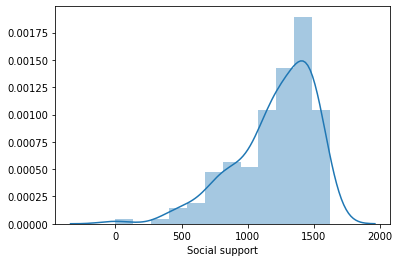

In [12]:
# data
x = df1['Social support']

# plot
sns.distplot(x)

Stats = 0.9073694348335266   p-value = 2.1575829123321455e-08


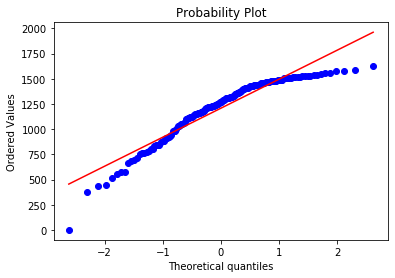

In [13]:
# package
import scipy.stats as stats # needed for normal study
import pylab as pylab # needed for the qq plot

# Shapiro Wills test
stat, pvalue = stats.shapiro(x)
print("Stats = {}   p-value = {}".format(stat, pvalue))

# quartil-quartil plot
stats.probplot(x, dist = 'norm', plot = pylab)
pylab.show()

In the four variables, a normal distribution has been found, so we can perform a correlation study of Pearson's R

## Lineal model that explains happiness through GPD per capita

In [52]:
# First, we have to select the data we want.
df2 = data[['Country or region', 'Score', 'GDP per capita']]

# now we must see if there are missing data 
print(df2.isna().any())

# and a little summary of data
df2[['Score', 'GDP per capita']].describe()

Country or region    False
Score                False
GDP per capita       False
dtype: bool


,Score,GDP per capita
count,156.000000,156.000000
mean,5407.096154,905.147436
std,1113.119869,398.389464
min,2853.000000,0.000000
25%,4544.500000,602.750000
50%,5379.500000,960.000000
75%,6184.500000,1232.500000
max,7769.000000,1684.000000


We have not observed NA data, but instead, we have detected null (zero) data in GPD per capita. This could be equivalent to missing data for a particular country and could hurt our model.

In [53]:
# Let's see the countries with a value of 0 in GDP per capita
df2[df2['GDP per capita'] == 0]

,Country or region,Score,GDP per capita
111,Somalia,4668,0


We can see that Somalia has a happiness score slightly below the average, 4668 for the average of 5407. However, the standard deviation of happiness is 1113, which makes us think that this is quite correct, as opposed to GDP per capita, which is 0.

We will remove Somalia from our data to avoid problems in our correlation model.

In [54]:
# drop Somalia
df2_clean = df2.drop([111]).copy()

# let's see summary
df2_clean[['Score', 'GDP per capita']].describe()

,Score,GDP per capita
count,155.000000,155.000000
mean,5411.864516,910.987097
std,1115.128460,392.925408
min,2853.000000,26.000000
25%,4541.000000,615.000000
50%,5386.000000,960.000000
75%,6187.000000,1234.000000
max,7769.000000,1684.000000


Now we will make a graph to see if there is any relation a priori between 'GDP per capita' and 'Score'.

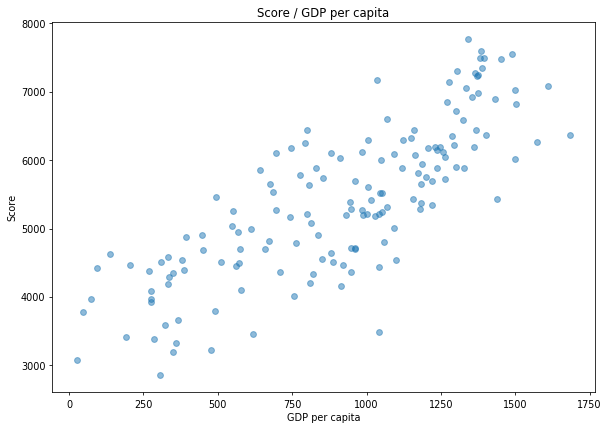

In [55]:
# package
import matplotlib.pyplot as plt # for plot wit matplotlib

# data
y_axis = df2_clean['Score'] # possible dependent variable
x_axis = df2_clean['GDP per capita'] # possible independent variable

# Plot
plt.figure(figsize= (10, 7), dpi= 70) # size plot
plt.scatter(x_axis, y_axis, alpha=0.5) # assignment of the variables to the axes

plt.title('Score / GDP per capita') # tittle
plt.xlabel('GDP per capita') # label of x axis
plt.ylabel('Score') # label of y axis

# show the plot
plt.show()

A certain tendency towards linearity can be seen. According to the previous study, Score and GDP per capita have an R coefficient of 0.79, quite strong

Let's calculate the model with a linear model, to see its results.

In [56]:
# packages
import numpy as np

# data
y = df2_clean['Score'] # possible dependent variable
x = df2_clean['GDP per capita'] # possible independent variable

# Pearson correlation coefficient and p-value
pearCoor, pvalue = stats.pearsonr(x, y)
print("Correlation coefficient {} and p-value {}".format(round(pearCoor, 2), round(pvalue, 5)))

Correlation coefficient 0.8 and p-value 0.0


We see that it has a p-value below 0.05, which means that the result is significant.

Now, we are going to make a linear model and show the results in a plot.

Regression line: y=3346.88+2.27x, r=0.80


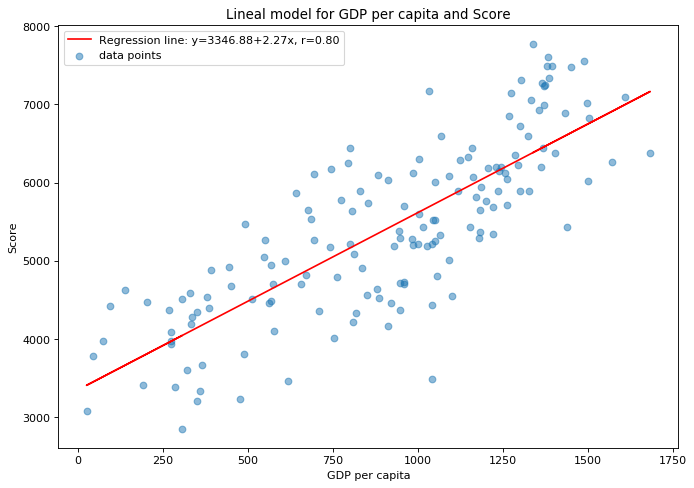

In [57]:
# I create the model with the above data
slope, intercept, r, p, stderr = stats.linregress(x, y)

# show the results
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
print(line)

# plot
plt.figure(figsize= (10, 7), dpi= 80) # size plot
plt.scatter(x, y, alpha=0.5, label = 'data points') # assignment of the variables to the axes
plt.plot(x, intercept + slope * x, label = line, color = 'red')

# axes legend and tittle
plt.title('Lineal model for GDP per capita and Score')
plt.xlabel('GDP per capita')
plt.ylabel('Score')
plt.legend(facecolor='white')
plt.show()

We can interpret that for every $1 that the GDP per capita increases, we increase the Happiness Score by 2.27 points.

## Lineal model that explains happiness through Healthy life expectancy

Now we will perform the same study to observe the results in Healthy life expectancy.

In [58]:
# First, we have to select the data we want.
df3 = data[['Country or region', 'Score', 'Healthy life expectancy']]

# now we must see if there are missing data 
print(df3.isna().any())

# and a little summary of data
df3[['Score', 'Healthy life expectancy']].describe()

Country or region          False
Score                      False
Healthy life expectancy    False
dtype: bool


,Score,Healthy life expectancy
count,156.000000,156.000000
mean,5407.096154,725.243590
std,1113.119869,242.123998
min,2853.000000,0.000000
25%,4544.500000,547.750000
50%,5379.500000,789.000000
75%,6184.500000,881.750000
max,7769.000000,1141.000000


It can be seen that there is a minimum in Healthy life expectancy of 0 years, which is not possible. Let's see what this is about and eliminate this data that will falsify our linear model.

In [59]:
# Let's see the countries with a value of 0 in GDP per capita
df3[df3['Healthy life expectancy'] == 0]

,Country or region,Score,Healthy life expectancy
134,Swaziland,4212,0


Swaziland is a rather poor country in south-central Africa. However, it is very doubtful that it has 0 as a life expectancy. We will eliminate this data to carry out the study.

Regression line: y=2710.28+3.71x, r=0.79


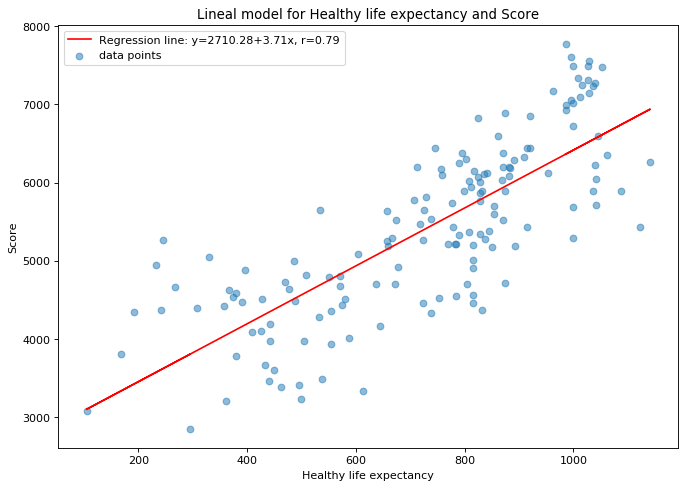

In [60]:
# drop Swaziland
df3_clean = df3.drop([134]).copy()

# data
y = df3_clean['Score'] # possible dependent variable
x = df3_clean['Healthy life expectancy'] # possible independent variable

# I create the model with the above data
slope, intercept, r, p, stderr = stats.linregress(x, y)

# show the results
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
print(line)

# plot
plt.figure(figsize= (10, 7), dpi= 80) # size plot
plt.scatter(x, y, alpha=0.5, label = 'data points') # assignment of the variables to the axes
plt.plot(x, intercept + slope * x, label = line, color = 'red')

# axes legend and tittle
plt.title('Lineal model for Healthy life expectancy and Score')
plt.xlabel('Healthy life expectancy')
plt.ylabel('Score')
plt.legend(facecolor='white')
plt.show()

For every year that life expectancy increases, the Happiness Score increases by 3.71 points.

## Lineal model that explains happiness through Social support.

Now we will perform the same study to observe the results in Healthy life expectancy Social support.

In [61]:
# First, we have to select the data we want.
df4 = data[['Country or region', 'Score', 'Social support']]

# now we must see if there are missing data 
print(df4.isna().any())

# and a little summary of data
df4[['Score', 'Social support']].describe()

Country or region    False
Score                False
Social support       False
dtype: bool


,Score,Social support
count,156.000000,156.000000
mean,5407.096154,1208.814103
std,1113.119869,299.191401
min,2853.000000,0.000000
25%,4544.500000,1055.750000
50%,5379.500000,1271.500000
75%,6184.500000,1452.500000
max,7769.000000,1624.000000


We see again that there is some data in Social support that is zero and that is probably a lack of data. Let's see what this is about and we'll skip that data.

In [62]:
# Let's see the countries with a value of 0 in GDP per capita
df4[df4['Social support'] == 0]

,Country or region,Score,Social support
154,Central African Republic,3083,0


Regression line: y=1765.20+3.01x, r=0.77


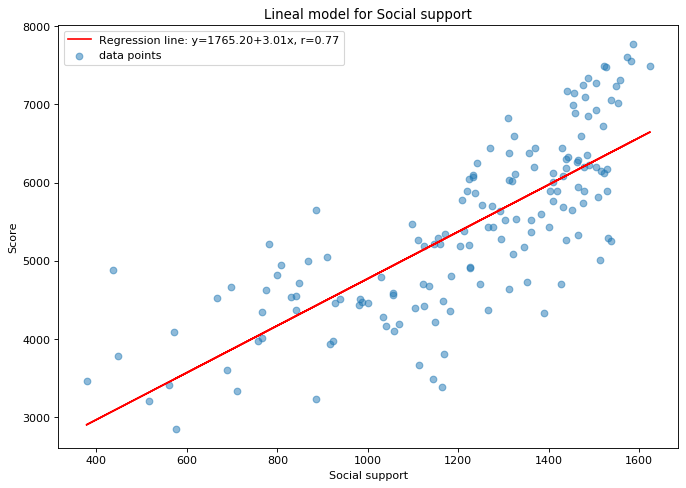

In [63]:
# drop Swaziland
df4_clean = df4.drop(154).copy()

# data
y = df4_clean['Score'] # possible dependent variable
x = df4_clean['Social support'] # possible independent variable

# I create the model with the above data
slope, intercept, r, p, stderr = stats.linregress(x, y)

# show the results
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
print(line)

# plot
plt.figure(figsize= (10, 7), dpi= 80) # size plot
plt.scatter(x, y, alpha=0.5, label = 'data points') # assignment of the variables to the axes
plt.plot(x, intercept + slope * x, label = line, color = 'red')

# axes legend and tittle
plt.title('Lineal model for Social support')
plt.xlabel('Social support')
plt.ylabel('Score')
plt.legend(facecolor='white')
plt.show()

We see that for each point in social support, we raise 3.01 points in the happiness score and that this model explains the data to 77%.

However, all these models take into account only one variable and happiness does not depend on only one variable. We must make a linear multivariate model to see the results.

# Linear multivariate model

In [86]:
# select de data
df5 = data[['Country or region', 'Score', 'GDP per capita', 'Healthy life expectancy', 'Social support']]

df5_clean = df5.drop([111, 154, 134]) # drop cero datas
df5_clean

,Country or region,Score,GDP per capita,Healthy life expectancy,Social support
0,Finland,7769,1340,986,1587
1,Denmark,7600,1383,996,1573
2,Norway,7554,1488,1028,1582
3,Iceland,7494,1380,1026,1624
4,Netherlands,7488,1396,999,1522
...,...,...,...,...,...
150,Yemen,3380,287,463,1163
151,Rwanda,3334,359,614,711
152,Tanzania,3231,476,499,885
153,Afghanistan,3203,350,361,517


In [95]:
# package required
from sklearn import linear_model

# data select for do model
x = df5_clean[['GDP per capita', 'Healthy life expectancy', 'Social support']] # independent veriable
y = df5_clean['Score'] # independent variable

# model definition
lm = linear_model.LinearRegression()
model = lm.fit(x, y)

# describe model 
Rscore = lm.score(x, y) # R² score
gdp, healthly, social = lm.coef_  # coefficients
base = lm.intercept_ # intercept

print("Model Coefficients:", "\n", "GDP per capita = {} \n Healthy life expectancy = {} \n Social support = {}".format(gdp, healthly, social))
print("Base value (intercept in y) = {}".format(base))
print("\n", "R2 score = {}".format(round(Rscore, 2)) )

Model Coefficients: 
 GDP per capita = 0.8292433951712572 
 Healthy life expectancy = 1.2975174177308704 
 Social support = 1.4354879478121325
Base value (intercept in y) = 1965.922068391541

 R2 score = 0.73


We can observe that the model explains the data in 73%, slightly lower than the single-variable models, but that it totally changes the proportion in which each variable affects the happiness score. 

Thus, we could conclude that happiness is given by a series of variables, among which Social support has a greater contribution to the explanation of the data, along with Healthy life expectancy, leaving GDP per capita as the third largest contributor. 

However, it should be borne in mind that this is an observational study. This means that there is no experimentation possible to see if these variables have a cause-effect effect on the happiness score, and that there may be hundreds of variables that are not included in the data. 

This will be one of the next topics to be discussed.